In [1]:
!pip install plotly seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('social_media_engagement.csv')

In [4]:
df.head()

,post_id,platform,post_type,date_posted,likes,comments,shares,impressions,reach,followers_at_post
0,1,Instagram,Text,2025-01-01,234,37,22,8314,6109,10024
1,2,Instagram,Image,2025-01-02,556,74,64,8164,6189,5070
2,3,Facebook,Video,2025-01-02,207,35,23,10115,9127,16719
3,4,LinkedIn,Text,2025-01-02,378,24,15,8055,7566,7094
4,5,LinkedIn,Story,2025-01-02,152,29,11,2423,2138,10667


In [5]:
df.shape

(243, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   post_id            243 non-null    int64 
 1   platform           243 non-null    object
 2   post_type          243 non-null    object
 3   date_posted        243 non-null    object
 4   likes              243 non-null    int64 
 5   comments           243 non-null    int64 
 6   shares             243 non-null    int64 
 7   impressions        243 non-null    int64 
 8   reach              243 non-null    int64 
 9   followers_at_post  243 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 19.1+ KB


In [7]:
## Create new features
df["engagements"] = df["likes"] + df["comments"] + df["shares"]
df["engagement_rate"] = (df["engagements"] / df["impressions"]) * 100

In [8]:
# Convert date column to datetime
df["date_posted"] = pd.to_datetime(df["date_posted"])

In [9]:
# Extract time features
df["day_of_week"] = df["date_posted"].dt.day_name()
df["week"] = df["date_posted"].dt.isocalendar().week

In [10]:
#KPI Summary
print("📊 KPI Summary")
print("Total Posts:", df["post_id"].nunique())
print("Total Impressions:", df["impressions"].sum())
print("Total Reach:", df["reach"].sum())
print("Average Engagement Rate: {:.2f}%".format(df["engagement_rate"].mean()))

📊 KPI Summary
Total Posts: 243
Total Impressions: 2572365
Total Reach: 2130113
Average Engagement Rate: 7.09%


In [11]:
#Engagement by Platform
platform_summary = df.groupby("platform")["engagement_rate"].mean().reset_index()
fig = px.bar(platform_summary, x="platform", y="engagement_rate",
             color="platform", title="Average Engagement Rate by Platform")
fig.show()

In [12]:
#Engagement by Post Type
post_type_summary = df.groupby("post_type")["engagement_rate"].mean().reset_index()

fig = px.bar(post_type_summary, x="post_type", y="engagement_rate",
             color="post_type", title="Average Engagement Rate by Post Type")
fig.show()

In [13]:
#Weekly Trend
weekly_trend = df.groupby("week")["engagement_rate"].mean().reset_index()

fig = px.line(weekly_trend, x="week", y="engagement_rate",
              markers=True, title="Weekly Engagement Rate Trend")
fig.show()

In [14]:
#Best Day to Post
day_summary = df.groupby("day_of_week")["engagement_rate"].mean().reset_index()

fig = px.bar(day_summary, x="day_of_week", y="engagement_rate",
             color="day_of_week", title="Best Day to Post")
fig.show()

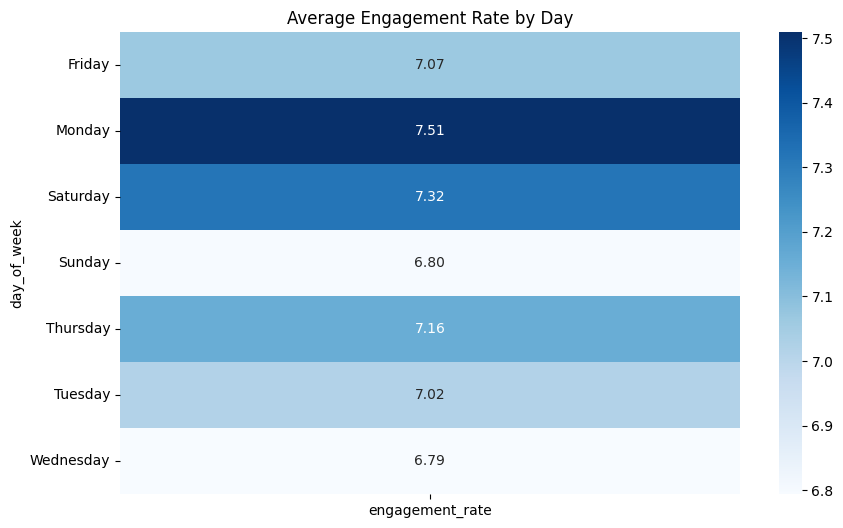

In [15]:
#Heatmap (Day vs Engagement Rate)
plt.figure(figsize=(10,6))
heatmap_data = df.pivot_table(index="day_of_week",
                              values="engagement_rate",
                              aggfunc="mean")
sns.heatmap(heatmap_data, annot=True, cmap="Blues", fmt=".2f")
plt.title("Average Engagement Rate by Day")
plt.show()

In [16]:
#Heatmap (Day × Hour Best Posting Time)

In [17]:
# Extract hour from date
df["hour"] = df["date_posted"].dt.hour

In [18]:
# Create pivot table (Day vs Hour)
heatmap_data = df.pivot_table(
    index="day_of_week",
    columns="hour",
    values="engagement_rate",
    aggfunc="mean"
)

In [19]:
# Reorder days for readability
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = heatmap_data.reindex(days_order)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



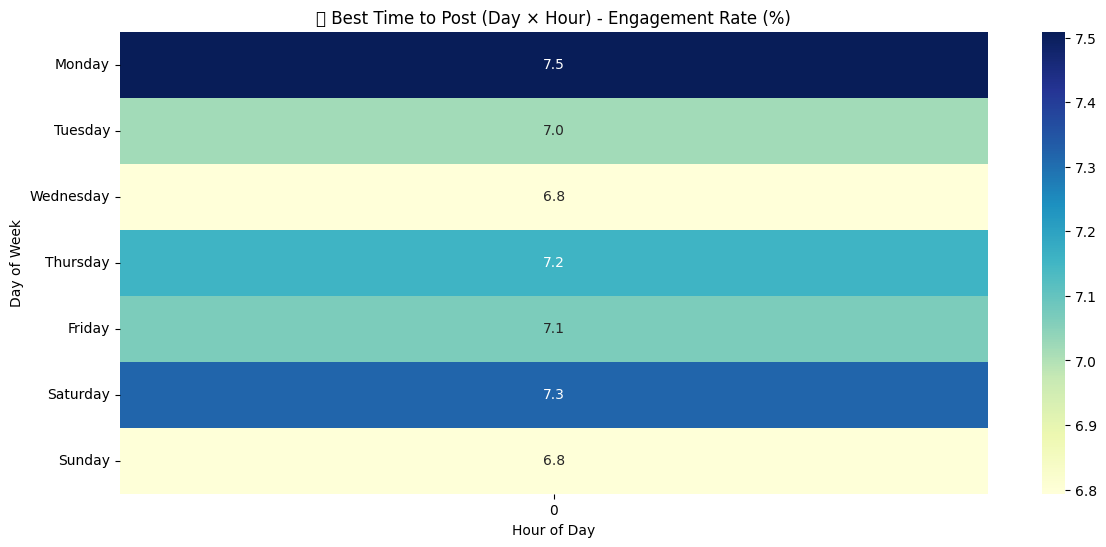

In [20]:
# Plot heatmap
plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("🔥 Best Time to Post (Day × Hour) - Engagement Rate (%)")
plt.ylabel("Day of Week")
plt.xlabel("Hour of Day")
plt.show()